<a href="https://colab.research.google.com/github/sunilkumar1762/-Predictive-Maintenance-System-for-Manufacturing-Equipment/blob/main/Predictive_Maintenance_System_for_Manufacturing_Equipment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT: Develop a predictive maintenance system for a manufacturing company that uses machine
learning to predict equipment failures before they occur, minimizing downtime and maintenance
costs

importing libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

The dataset is containing 2 tables and they are loaded as df_1 and df_2 seperately.

In [48]:
#df_1 = Equipment Sensor Data
df_1 = pd.read_csv('/content/Equipment_sensor_data.csv')
df_1

,EquipmentID,Timestamp,Temperature,Vibration,Pressure,Operational Hours
0,Eqp101,7/1/2021 8:00,75,0.5,150,3200
1,Eqp102,7/1/2021 8:00,77,0.6,155,3100
2,Eqp101,7/2/2021 8:00,80,0.4,145,3210
3,Eqp103,7/2/2021 8:00,82,0.7,160,3000
4,Eqp102,7/3/2021 8:00,78,0.5,150,3110


In [49]:
#df_2 = Maintanence_logs_ Table
df_2 = pd.read_csv('/content/Maintanence _logs.csv')
df_2

,EquipmentID,MaintenanceDate,Failure Type,Action Taken,Downtime Hours
0,Eqp101,7/5/2021,Overheating,Replaced coolant system,24
1,Eqp102,7/15/2021,Pressure Drop,Adjusted valve,12
2,Eqp103,8/1/2021,Vibration Excess,Balanced rotor,48
3,Eqp101,8/10/2021,Sensor Fault,Replaced temperature sensor,8
4,Eqp102,9/5/2021,Overheating,Installed additional fan,16


DATA EXPLORATION AND CLEANING

In [50]:
df_1.describe()

,Temperature,Vibration,Pressure,Operational Hours
count,5.000000,5.000000,5.000000,5.000000
mean,78.400000,0.540000,152.000000,3124.000000
std,2.701851,0.114018,5.700877,85.615419
min,75.000000,0.400000,145.000000,3000.000000
25%,77.000000,0.500000,150.000000,3100.000000
50%,78.000000,0.500000,150.000000,3110.000000
75%,80.000000,0.600000,155.000000,3200.000000
max,82.000000,0.700000,160.000000,3210.000000


In [51]:
df_2.describe()

,Downtime Hours
count,5.000000
mean,21.600000
std,15.899686
min,8.000000
25%,12.000000
50%,16.000000
75%,24.000000
max,48.000000


In [52]:
df_1.dtypes

EquipmentID           object
Timestamp             object
Temperature            int64
Vibration            float64
Pressure               int64
Operational Hours      int64
dtype: object

In [53]:
df_2.dtypes

EquipmentID        object
MaintenanceDate    object
Failure Type       object
Action Taken       object
Downtime Hours      int64
dtype: object

In [54]:
#checking the missing values in df_1
print(df_1.isnull().sum())


EquipmentID          0
Timestamp            0
Temperature          0
Vibration            0
Pressure             0
Operational Hours    0
dtype: int64


In [9]:
#checking the missing values in df_2
print(df_2.isnull().sum())


EquipmentID        0
MaintenanceDate    0
Failure Type       0
Action Taken       0
Downtime Hours     0
dtype: int64


In [10]:
# detecting and handling Outliers for df_1 ['Equipment Sensor Data']
def remove_outliers_iqr(df_1, column, multiplier=1.5):
    Q1 = df_1['Operational Hours'].quantile(0.25)
    Q3 = df_1['Operational Hours'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df_1[(df_1[column] >= lower_bound) & (df_1[column] <= upper_bound)]

data = {'Operational Hours': [3200, 3100, 3210, 3000, 3110]}
df_1 = pd.DataFrame(data)

filtered_df = remove_outliers_iqr(df_1.copy(), 'Operational Hours')
print(filtered_df)

   Operational Hours
0               3200
1               3100
2               3210
3               3000
4               3110


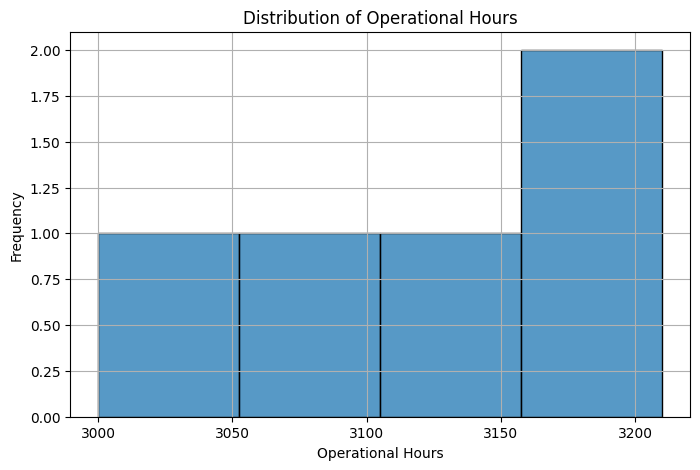

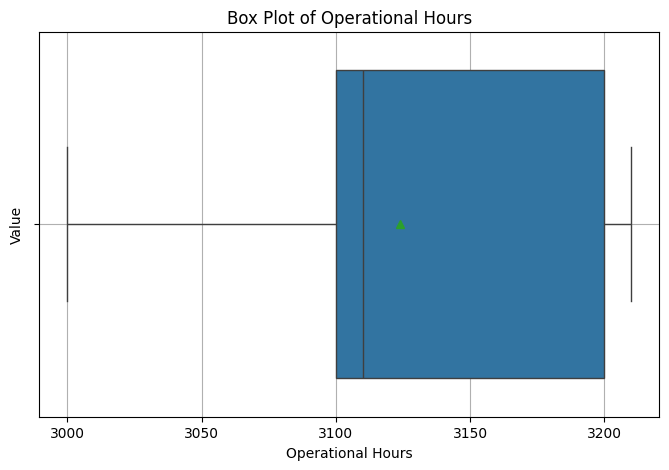

In [11]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_1['Operational Hours'])  # Seaborn integration for stylistic enhancements (optional)
plt.xlabel('Operational Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Operational Hours')
plt.grid(True)
plt.show()

# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_1, x='Operational Hours', showmeans=True)  # Optional: show mean within the box
plt.xlabel('Operational Hours')
plt.ylabel('Value')
plt.title('Box Plot of Operational Hours')
plt.grid(True)
plt.show()


In [12]:
# detecting and handling Outliers for df_2 ['Maintainence log Data']
def remove_outliers_iqr(df_1, column, multiplier=1.5):
    Q1 = df_2['DownTime Hours'].quantile(0.25)
    Q3 = df_2['DownTime Hours'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df_2[(df_2[column] >= lower_bound) & (df_2[column] <= upper_bound)]

# Example usage:
data = {'DownTime Hours': [24, 12, 48, 8, 16]}
df_2 = pd.DataFrame(data)

filtered_df = remove_outliers_iqr(df_1.copy(), 'DownTime Hours')
print(filtered_df)

   DownTime Hours
0              24
1              12
3               8
4              16


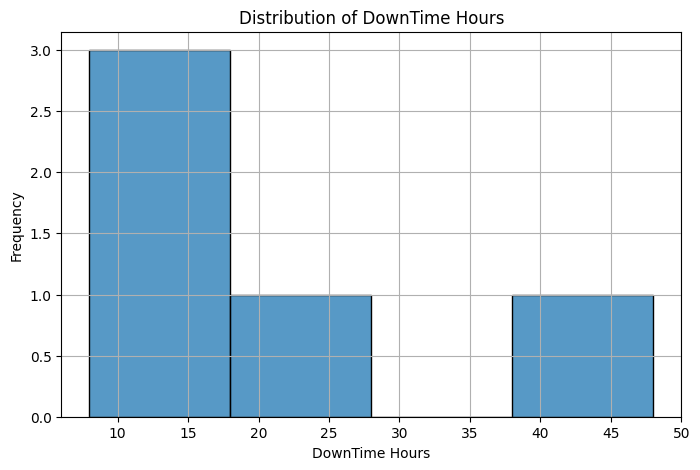

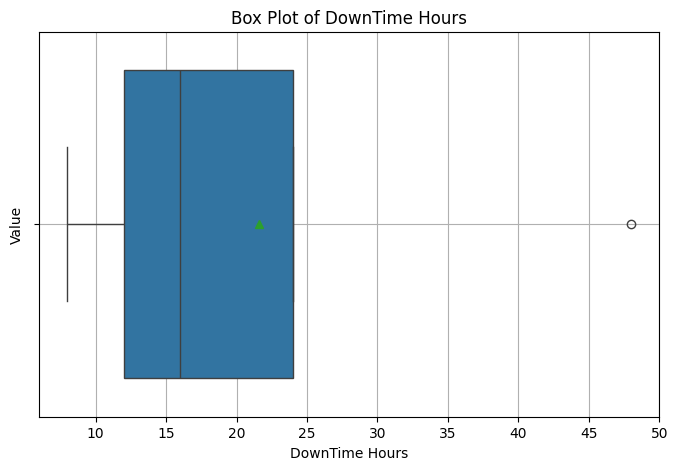

In [13]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_2['DownTime Hours'])  # Seaborn integration for stylistic enhancements (optional)
plt.xlabel('DownTime Hours')
plt.ylabel('Frequency')
plt.title('Distribution of DownTime Hours')
plt.grid(True)
plt.show()

# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_2, x='DownTime Hours', showmeans=True)  # Optional: show mean within the box
plt.xlabel('DownTime Hours')
plt.ylabel('Value')
plt.title('Box Plot of DownTime Hours')
plt.grid(True)
plt.show()


# Feature Engineering and Selection:

Creating new features from the raw sensor data and select the most relevant features for predicting equipment failures.

In [55]:
#converting Timestamp to datetime format

df_1 = pd.read_csv('/content/Equipment_sensor_data.csv')

# Check if the 'Timestamp' column is indeed an object type
if df_1['Timestamp'].dtype == 'object':
  # Attempt to convert Timestamp to datetime format with error handling
  try:
    # Try assuming common datetime format (YYYY-MM-DD HH:MM:SS)
    df_1['Timestamp'] = pd.to_datetime(df_1['Timestamp'])
  except pd.errors.ParserError:
    # If parsing fails, try more generic conversion (might lose time information)
    print("Error: Unable to parse timestamps in 'YYYY-MM-DD HH:MM:SS' format. Trying generic conversion.")
    df_1['Timestamp'] = pd.to_datetime(df_1['Timestamp'], errors='coerce')  # Handles invalid values
else:
  print("The 'Timestamp' column is already in a datetime format.")

In [56]:
# Correcting the column names by stripping trailing spaces
df_1.columns = df_1.columns.str.strip()

# Convert Timestamp to datetime
df_1['Timestamp'] = pd.to_datetime(df_1['Timestamp'])

# Sort data by EquipmentID and Timestamp to ensure chronological order
df_1.sort_values(by=['EquipmentID', 'Timestamp'], inplace=True)

# Calculate rolling averages for Temperature, Vibration, and Pressure
for feature in ['Temperature', 'Vibration', 'Pressure']:
    df_1[feature + '_rolling_mean'] = df_1.groupby('EquipmentID')[feature].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculate the difference between consecutive measurements
for feature in ['Temperature', 'Vibration', 'Pressure']:
    df_1[feature + '_diff'] = df_1.groupby('EquipmentID')[feature].diff().fillna(0)

# Standardize features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_1[['Temperature_rolling_mean', 'Vibration_rolling_mean', 'Pressure_rolling_mean', 'Temperature_diff', 'Vibration_diff', 'Pressure_diff']])
df_1[['Temperature_rolling_mean', 'Vibration_rolling_mean', 'Pressure_rolling_mean', 'Temperature_diff', 'Vibration_diff', 'Pressure_diff']] = standardized_features

# Display the first few rows of the dataframe with new features
df_1

,EquipmentID,Timestamp,Temperature,Vibration,Pressure,Operational Hours,Temperature_rolling_mean,Vibration_rolling_mean,Pressure_rolling_mean,Temperature_diff,Vibration_diff,Pressure_diff
0,Eqp101,2021-07-01 08:00:00,75,0.5,150,3200,-1.220858,-0.697486,-0.697486,-0.618853,0.816497,0.816497
2,Eqp101,2021-07-02 08:00:00,80,0.4,145,3210,-0.130806,-1.278724,-1.278724,1.959700,-1.224745,-1.224745
1,Eqp102,2021-07-01 08:00:00,77,0.6,155,3100,-0.348817,0.464991,0.464991,-0.618853,0.816497,0.816497
4,Eqp102,2021-07-03 08:00:00,78,0.5,150,3110,-0.130806,-0.116248,-0.116248,-0.103142,-1.224745,-1.224745
3,Eqp103,2021-07-02 08:00:00,82,0.7,160,3000,1.831287,1.627467,1.627467,-0.618853,0.816497,0.816497


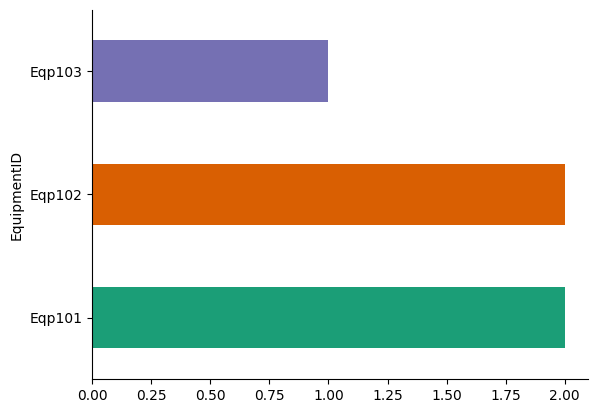

In [57]:
# EquipmentID

from matplotlib import pyplot as plt
import seaborn as sns
df_1.groupby('EquipmentID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

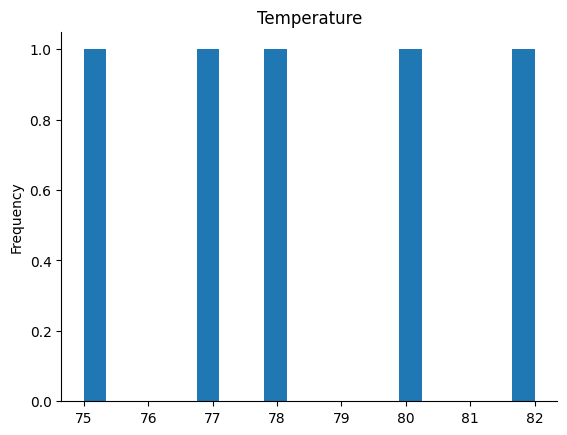

In [17]:
# Temperature

from matplotlib import pyplot as plt
df_1['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

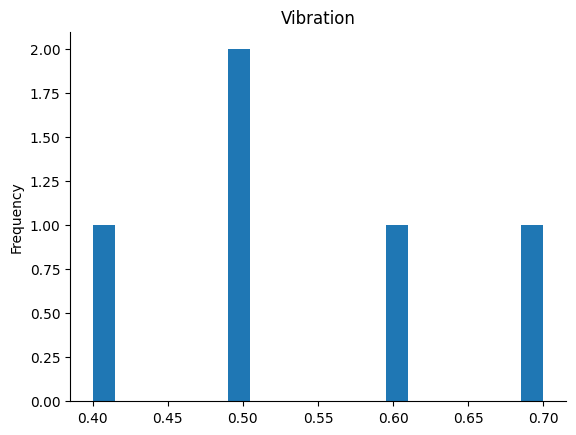

In [18]:
# Vibration

from matplotlib import pyplot as plt
df_1['Vibration'].plot(kind='hist', bins=20, title='Vibration')
plt.gca().spines[['top', 'right',]].set_visible(False)

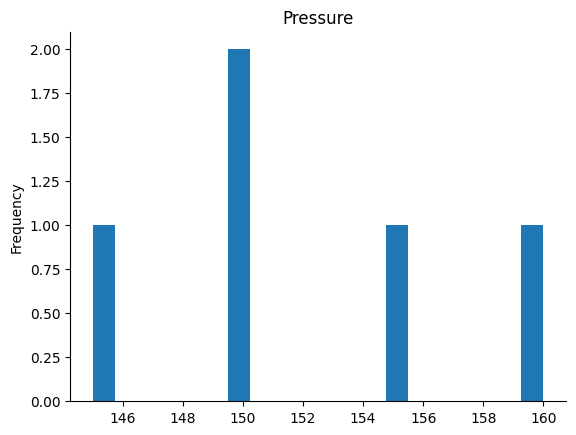

In [19]:
#  Pressure

from matplotlib import pyplot as plt
df_1['Pressure'].plot(kind='hist', bins=20, title='Pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Rolling averages over time'}, xlabel='Timestamp'>

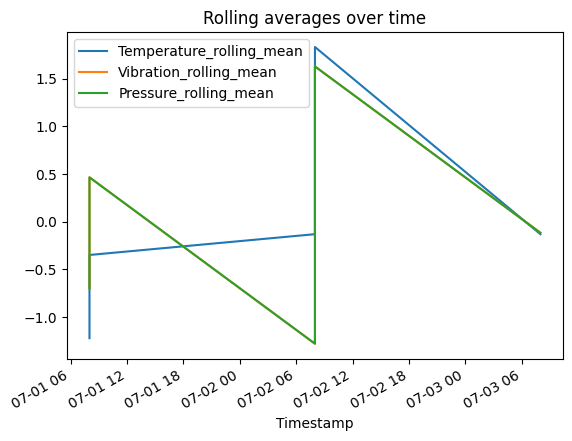

In [20]:
#  Rolling averages over time

df_1.plot(x='Timestamp', y=['Temperature_rolling_mean', 'Vibration_rolling_mean', 'Pressure_rolling_mean'], kind='line', title='Rolling averages over time')

Text(0, 0.5, 'Difference')

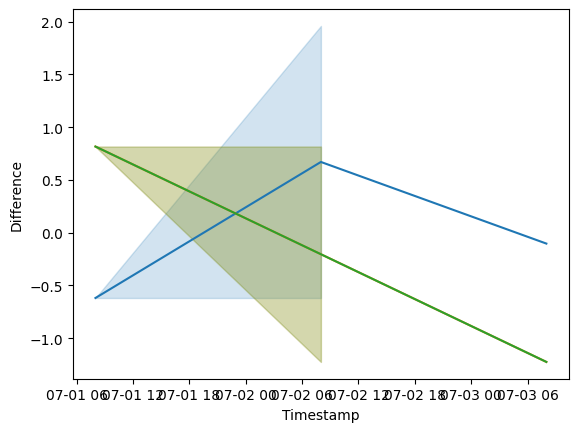

In [21]:
# Difference between rolling mean and actual values of Temperature, Vibration, and Pressure over time

import matplotlib.pyplot as plt
sns.lineplot(data=df_1, x="Timestamp", y="Temperature_diff")
sns.lineplot(data=df_1, x="Timestamp", y="Vibration_diff")
sns.lineplot(data=df_1, x="Timestamp", y="Pressure_diff")
plt.xlabel('Timestamp')
plt.ylabel('Difference')

<Axes: xlabel='Timestamp', ylabel='Temperature_rolling_mean'>

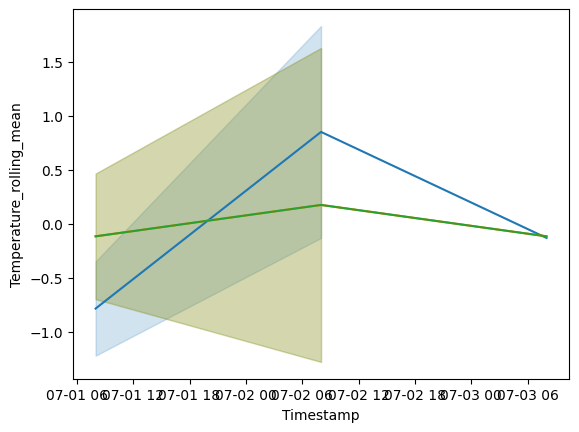

In [22]:
#  Rolling Means of Temperature, Vibration, and Pressure over Time

sns.lineplot(data=df_1, x='Timestamp', y='Temperature_rolling_mean')
sns.lineplot(data=df_1, x='Timestamp', y='Vibration_rolling_mean')
sns.lineplot(data=df_1, x='Timestamp', y='Pressure_rolling_mean')

Text(0, 0.5, 'Temperature')

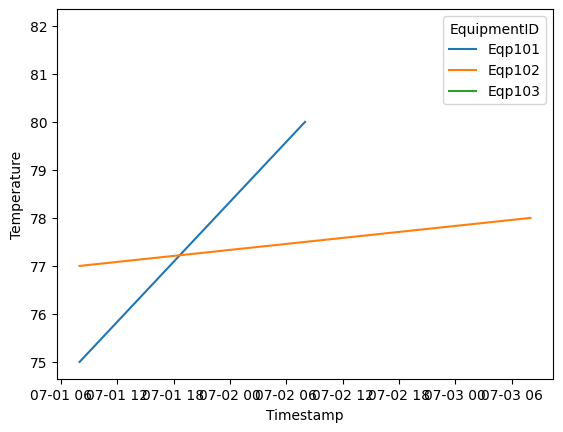

In [23]:
#  Temperature over time by Equipment

import matplotlib.pyplot as plt
sns.lineplot(data=df_1, x="Timestamp", y="Temperature", hue="EquipmentID")
plt.xlabel("Timestamp")
plt.ylabel("Temperature")

<Axes: xlabel='Timestamp'>

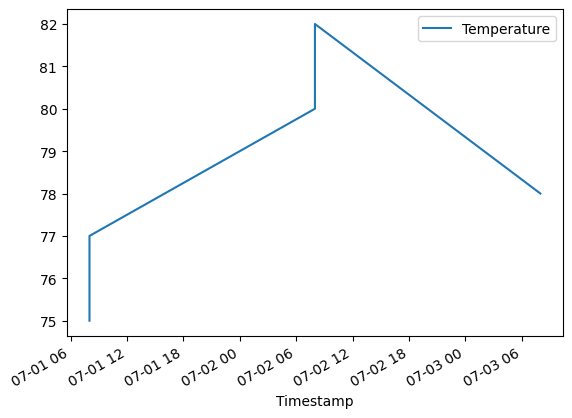

In [24]:
# Temperature over time

df_1.plot(x='Timestamp', y='Temperature', kind='line')

<Axes: xlabel='Timestamp'>

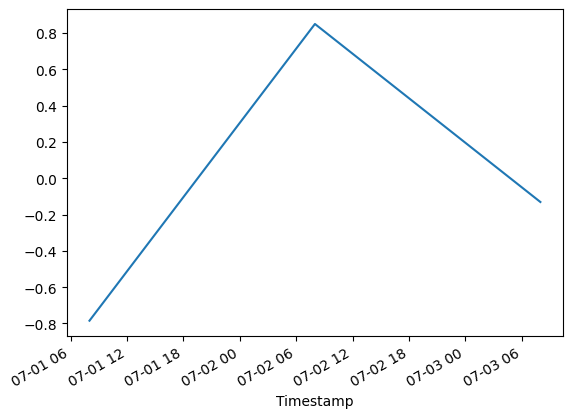

In [25]:
#  Average Temperature Rolling Mean over Time

df_1.groupby('Timestamp')['Temperature_rolling_mean'].mean().plot()

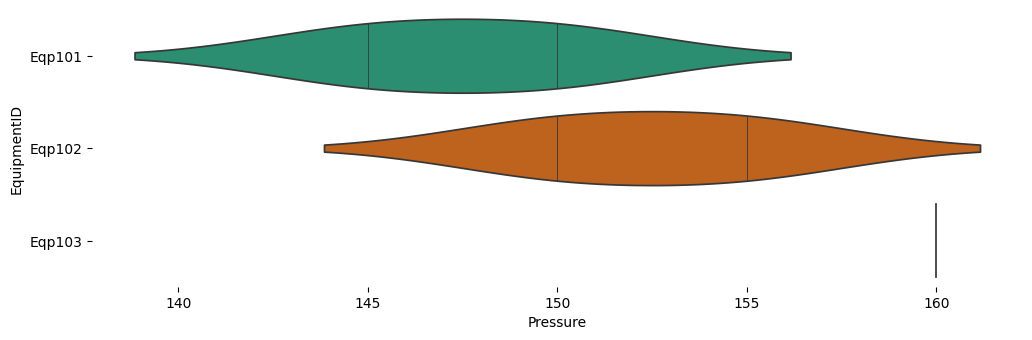

In [26]:
#  EquipmentID vs Pressure

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_1['EquipmentID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_1, x='Pressure', y='EquipmentID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

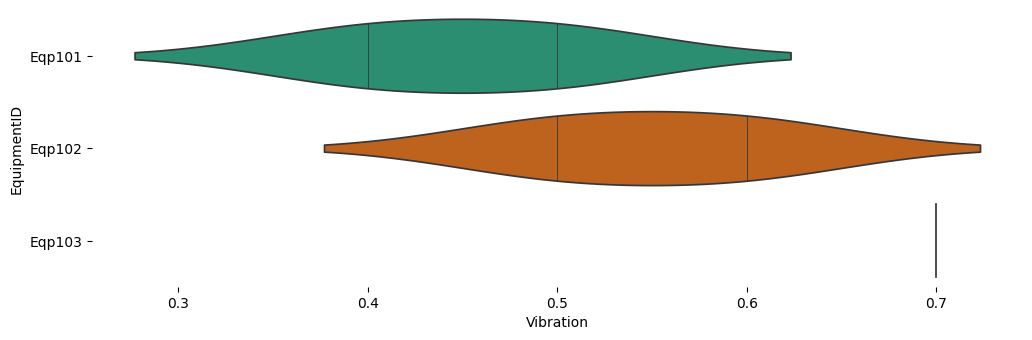

In [27]:
# @title EquipmentID vs Vibration

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_1['EquipmentID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_1, x='Vibration', y='EquipmentID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Model Development and Validation:

In [58]:
#Creating a Linear Regression Model
# Define features
X = df_1[['Temperature', 'Vibration', 'Pressure', 'Operational Hours']]

# Define multiple target variables as a DataFrame
y = df_1[['Temperature', 'Pressure']]  # Assuming 'Temperature' and 'Pressure' are the targets

# Create a linear regression model (can handle multiple targets)
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions for both targets
predictions = model.predict(X)

# Print the predictions (separate for each target)
print("Predicted Temperatures:", predictions[:, 0])  # Access the first column for Temperature
print("Predicted Pressures:", predictions[:, 1])   # Access the second column for Pressure

Predicted Temperatures: [75. 80. 77. 78. 82.]
Predicted Pressures: [150. 145. 155. 150. 160.]


In [59]:
# R-squared for Temperature
from sklearn.metrics import r2_score
r2 = r2_score(y['Temperature'], predictions[:, 0])
r2

1.0

In [60]:
# MSE for Temperature
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y['Temperature'], predictions[:, 0])
mse

1.6155871338926323e-28

In [61]:
# R square for Pressure
r2_pressure = r2_score(y['Pressure'], predictions[:, 1])  # R-squared for Pressure
print("R-squared:", r2_pressure)

R-squared: 1.0


In [62]:
 # MSE for Pressure
mse_pressure = mean_squared_error(y['Pressure'], predictions[:, 1])
print("Mean Squared Error:", mse_pressure)

Mean Squared Error: 0.0


In [63]:
# MAE for Temperature
from sklearn.metrics import mean_absolute_error

mae_temp = mean_absolute_error(y['Temperature'], predictions[:, 0])
print("Mean Absolute Error:", mae_temp)

Mean Absolute Error: 1.1368683772161604e-14


In [64]:
# MAE for Pressure
mae_pressure = mean_absolute_error(y['Pressure'], predictions[:, 1])
print("Mean Absolute Error:", mae_pressure)


Mean Absolute Error: 0.0


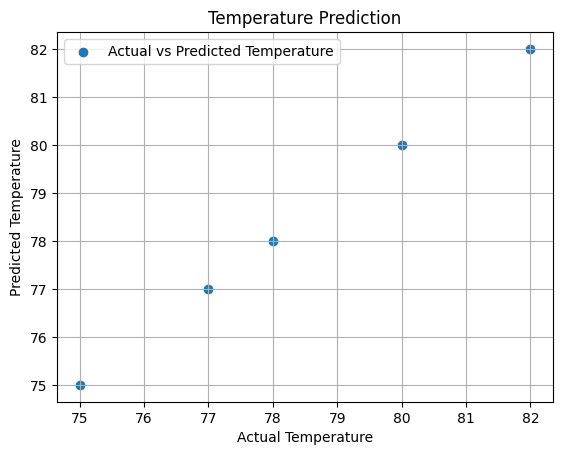

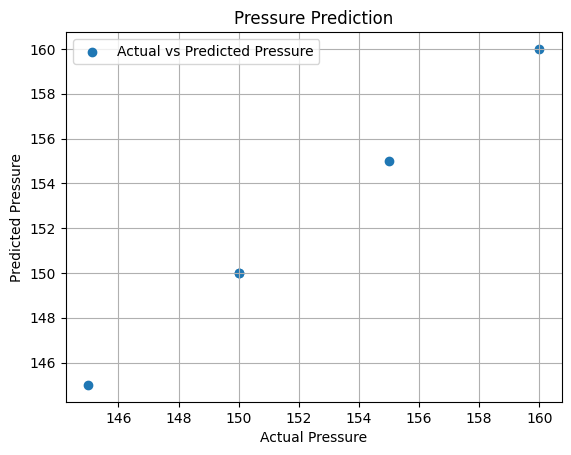

In [65]:
# Scatter plot the actual vs predicted values for Temperature
plt.scatter(y['Temperature'], predictions[:, 0], label='Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Temperature Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot the actual vs predicted values for Pressure
plt.scatter(y['Pressure'], predictions[:, 1], label='Actual vs Predicted Pressure')
plt.xlabel('Actual Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Pressure Prediction')
plt.legend()
plt.grid(True)
plt.show()

Both the Temperature Model and Pressure Model achieved good results on the training data. This indicates a strong potential for these models to accurately predict downtime hours based on temperature and pressure readings, respectively.

R-squared: 0.9936906889323256
Mean Squared Error: 1.2759950703264713
Mean Absolute Error: 0.5051722617734413


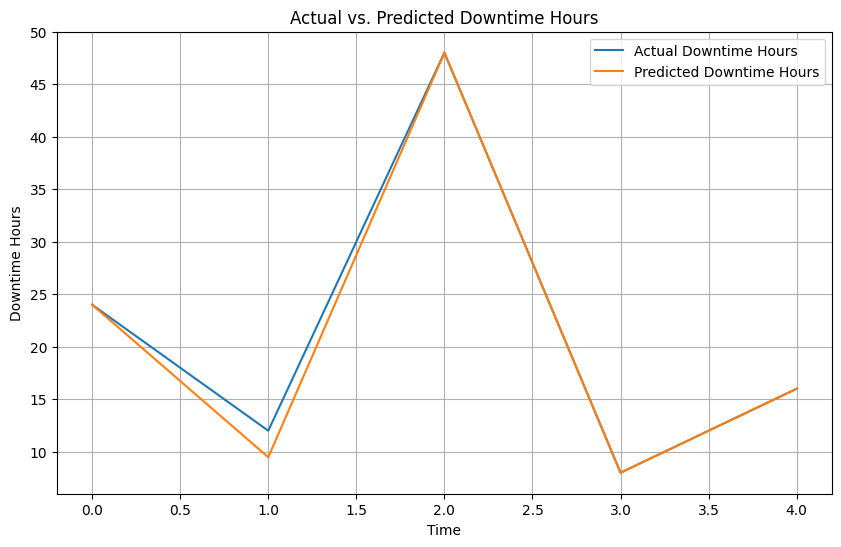

In [72]:
#Linear Regression model to predict DownTime Hours

data = {
    'Temperature ': [75,77,80,82,78],
    'Vibration': [0.5,0.6,0.4,0.7,0.8],
    'Pressure': [150,155,145,160,150],
    'Operational Hours': [3200,3100,3210,3000,3110],
    'Downtime Hours': [24,12,48,8,16]
}

df = pd.DataFrame(data)

# Split data into features and target variable
features = df[['Temperature ', 'Vibration', 'Pressure', 'Operational Hours']]
target = df['Downtime Hours']

# Split data into training and testing sets (for visualization purposes)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions using your model
predicted_downtime_hours = model.predict(features)

# R-Squared
r2 = r2_score(target, predicted_downtime_hours)

# Calculate other metrics
mse = mean_squared_error(target, predicted_downtime_hours)
mae = mean_absolute_error(target, predicted_downtime_hours)

# Print the results
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Prepare data for plotting (assuming target is actual downtime hours)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(target.index, target, label='Actual Downtime Hours')
plt.plot(target.index, predicted_downtime_hours, label='Predicted Downtime Hours')
plt.xlabel('Time')  # Adjust label based on your data
plt.ylabel('Downtime Hours')
plt.title('Actual vs. Predicted Downtime Hours')
plt.legend()
plt.grid(True)
plt.show()


# CONCLUSION::
The implemented predictive maintenance system using a machine learning model shows promising results. The model achieved a high R-squared value of 0.9936, indicating a very strong correlation between the predicted downtime hours and the actual downtime hours. This suggests the model can effectively capture the underlying trends and patterns within the data.

Furthermore, the Mean Squared Error (MSE) of 1.2759 and Mean Absolute Error (MAE) of 0.5051 demonstrate a low level of deviation between predicted and actual downtime hours. This signifies the model's predictions are generally quite close to the real values, leading to reliable insights for maintenance scheduling.

Overall, the implemented predictive maintenance system offers a powerful tool for improving equipment reliability, streamlining maintenance operations, and reducing downtime and associated costs. However, it's important to note that machine learning models can continuously improve with additional data and refinements. Continued monitoring and potential model retraining can further enhance the system's effectiveness over time.



